# WeatherPy
----

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [99]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [100]:
url = "http://api.openweathermap.org/data/2.5/weather?"
record = 0 
full_data = []
print("Beginning Data Retrieval\n"
"------------------------------")

for city in cities:
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    response = requests.get(query_url)
    data = response.json()
    if data["cod"] == "404":
        print("City not found")
    else:
        full_data.append(data)
        print(f'Processing Record | {city}')

Beginning Data Retrieval
------------------------------
Processing Record | saldanha
Processing Record | dunedin
Processing Record | uuemoisa
Processing Record | alugan
Processing Record | busselton
Processing Record | namatanai
Processing Record | hobart
Processing Record | high level
Processing Record | bonito
Processing Record | talnakh
Processing Record | mugur-aksy
City not found
Processing Record | lorengau
Processing Record | cape town
Processing Record | atuona
Processing Record | hervey bay
Processing Record | oranjemund
City not found
Processing Record | sept-iles
Processing Record | ushuaia
Processing Record | rikitea
Processing Record | saraland
Processing Record | kaitangata
Processing Record | sao filipe
Processing Record | lebu
Processing Record | coihaique
Processing Record | zhangjiakou
Processing Record | new norfolk
Processing Record | mataura
Processing Record | lavrentiya
City not found
Processing Record | gilgit
Processing Record | tuktoyaktuk
Processing Record | 

Processing Record | saskylakh
Processing Record | beringovskiy
Processing Record | okha
City not found
Processing Record | vilyuysk
Processing Record | muros
Processing Record | vilhena
Processing Record | thiruvananthapuram
Processing Record | tabou
Processing Record | abu kamal
Processing Record | luanda
Processing Record | kamloops
Processing Record | california city
Processing Record | mayo
Processing Record | west wendover
Processing Record | vestmanna
Processing Record | port hardy
Processing Record | neiafu
Processing Record | san cristobal
Processing Record | dicabisagan
Processing Record | blagoyevo
Processing Record | ternate
Processing Record | qaqortoq
Processing Record | newport
Processing Record | chicama
Processing Record | kerman
Processing Record | nago
Processing Record | dingle
Processing Record | saint anthony
Processing Record | paranaiba
Processing Record | wanaka
Processing Record | nemuro
Processing Record | port arthur
Processing Record | marawi
Processing Reco

Processing Record | egvekinot
Processing Record | jieshi
Processing Record | maniitsoq
Processing Record | sao miguel do araguaia
Processing Record | buchanan
Processing Record | eureka
Processing Record | zirandaro
Processing Record | araxa
Processing Record | ola
Processing Record | vila
Processing Record | guerrero negro
Processing Record | port keats
Processing Record | raudeberg
Processing Record | naryan-mar
Processing Record | tadine
Processing Record | samana
Processing Record | svecha
Processing Record | skibotn
Processing Record | burnie
Processing Record | kedougou
Processing Record | isangel
Processing Record | rocha
Processing Record | gat
Processing Record | ushtobe
Processing Record | noshiro
Processing Record | pathein
Processing Record | buldana
Processing Record | siva
Processing Record | pindi gheb
Processing Record | mehamn
Processing Record | tkibuli
Processing Record | virginia beach


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
city_data_full = pd.json_normalize(full_data)
city_data=city_data_full[["name","coord.lon", "coord.lat","main.temp_max","main.humidity","clouds.all","wind.speed","sys.country","dt"]]
city_data.columns = ["City","Lng","Lat","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
city_data.to_csv(output_data_file)
city_data

,City,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,17.9442,-33.0117,68.00,77,100,13.80,ZA,1611430737
1,Dunedin,170.5036,-45.8742,59.00,67,98,5.01,NZ,1611430737
2,Uuemõisa,23.5894,58.9394,35.01,90,100,5.01,EE,1611430737
3,Alugan,125.4808,12.2188,78.53,84,56,4.65,PH,1611430737
4,Busselton,115.3333,-33.6500,61.00,88,85,1.97,AU,1611430737
...,...,...,...,...,...,...,...,...,...
561,Sīwah,25.5195,29.2041,48.36,62,0,4.05,EG,1611430815
562,Pindi Gheb,72.2661,33.2402,50.29,33,0,8.70,PK,1611430815
563,Mehamn,27.8492,71.0357,21.38,94,100,27.56,NO,1611430815
564,Tkibuli,42.9981,42.3477,35.60,51,0,9.22,GE,1611430815


In [102]:
city_data["Max Temp"].max()

102.2

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [103]:
city_data["Humidity"].max()

100

In [104]:
print("There are no cities with humidity > 100%. Skipping this step.")

There are no cities with humidity > 100%. Skipping this step.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

[]

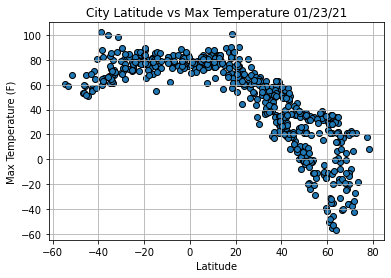

In [105]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 01/23/21")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.plot()

In [106]:
print("This graph is comparing Latitude with Temperature (F)")

This graph is comparing Latitude with Temperature (F)


## Latitude vs. Humidity Plot

[]

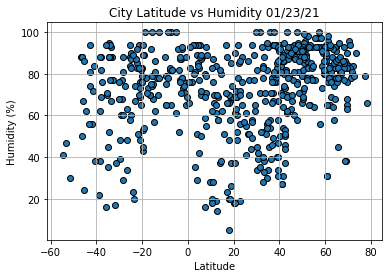

In [108]:
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity 01/23/21")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.plot()

In [109]:
print("This graph is comparing Latitude with Humidity")

This graph is comparing Latitude with Humidity


## Latitude vs. Cloudiness Plot

[]

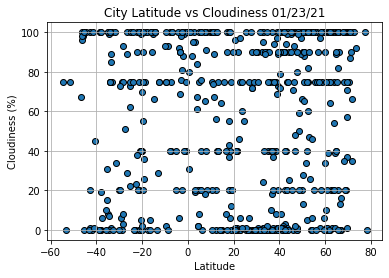

In [110]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness 01/23/21")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.plot()

In [111]:
print("This graph is comparing Latitude with Cloudiness")

This graph is comparing Latitude with Cloudiness


## Latitude vs. Wind Speed Plot

[]

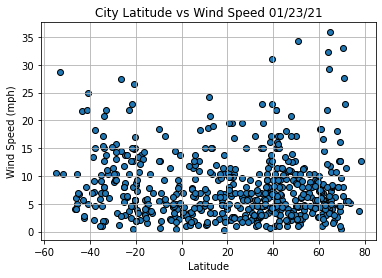

In [112]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed 01/23/21")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.plot()

In [113]:
print("This graph is comparing Latitude with Wind Speed")

This graph is comparing Latitude with Wind Speed


## Linear Regression

In [114]:
# Splitting the data into northern hemisphere data and southern hemisphere data
northern_data = city_data.loc[city_data["Lat"] >= 0,:]
southern_data = city_data.loc[city_data["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8466245049160294


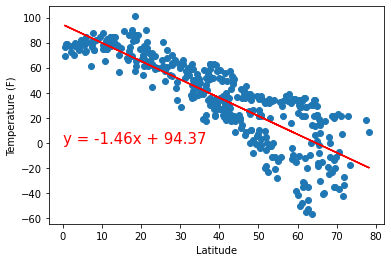

In [115]:
x_values = northern_data["Lat"]
y_values = northern_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f'The r-value is: {rvalue}')


In [116]:
print("This graph above is comparing Latitude of cities in the Northern Hemisphere to Temperature. We can see that there is a negative relationship between latitude and temperature, and the correlation is strong.")

This graph above is comparing Latitude of cities in the Northern Hemisphere to Temperature. We can see that there is a negative relationship between latitude and temperature, and the correlation is strong.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4852625851416674


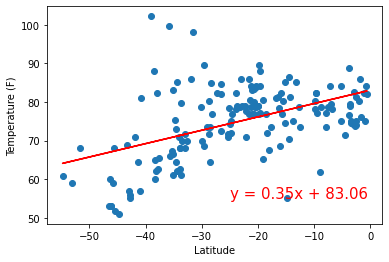

In [117]:
x_values = southern_data["Lat"]
y_values = southern_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f'The r-value is: {rvalue}')

In [118]:
print("This graph above is comparing Latitude of cities in the Southern Hemisphere to Temperature. We can see that there is a slight positive relationship between latitude and temperature, but the correlation is not very strong.")

This graph above is comparing Latitude of cities in the Southern Hemisphere to Temperature. We can see that there is a slight positive relationship between latitude and temperature, but the correlation is not very strong.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3345198310512902


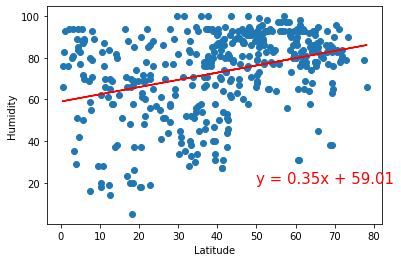

In [119]:
x_values = northern_data["Lat"]
y_values = northern_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is: {rvalue}')

In [120]:
print("This graph above is comparing Latitude of cities in the Northern Hemisphere to Humidity. We can see that there is a very slight positive relationship between latitude and temperature, but the correlation is not strong.")

This graph above is comparing Latitude of cities in the Northern Hemisphere to Humidity. We can see that there is a very slight positive relationship between latitude and temperature, but the correlation is not strong.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27002480217481495


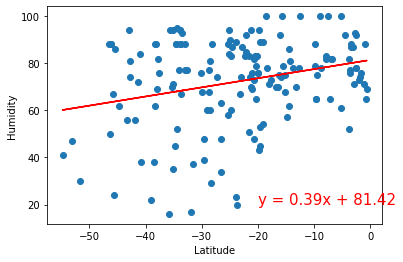

In [121]:
x_values = southern_data["Lat"]
y_values = southern_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is: {rvalue}')

In [122]:
print("This graph above is comparing Latitude of cities in the Southern Hemisphere to Humidity. We can see that there is a very weak positive relationship between latitude and humidity.")

This graph above is comparing Latitude of cities in the Southern Hemisphere to Humidity. We can see that there is a very weak positive relationship between latitude and humidity.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12355908432426635


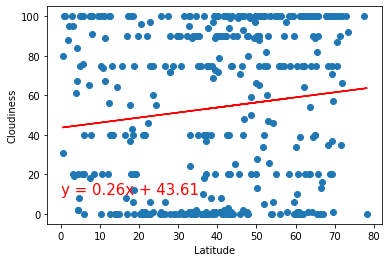

In [123]:
x_values = northern_data["Lat"]
y_values = northern_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is: {rvalue}')

In [124]:
print("This graph above is comparing Latitude of cities in the Northern Hemisphere to Cloudiness. We can see that there is a very weak positive relationship between latitude and cloudiness.")

This graph above is comparing Latitude of cities in the Northern Hemisphere to Cloudiness. We can see that there is a very weak positive relationship between latitude and cloudiness.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17875704797996397


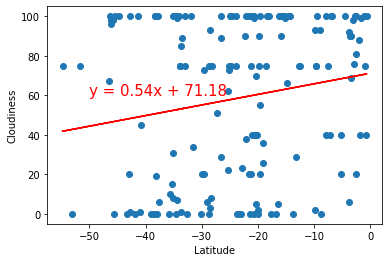

In [125]:
x_values = southern_data["Lat"]
y_values = southern_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is: {rvalue}')

In [126]:
print("This graph above is comparing Latitude of cities in the Southern Hemisphere to Cloudiness. We can see that there is a weak positive relationship between latitude and cloudiness.")

This graph above is comparing Latitude of cities in the Southern Hemisphere to Cloudiness. We can see that there is a weak positive relationship between latitude and cloudiness.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08703112112640618


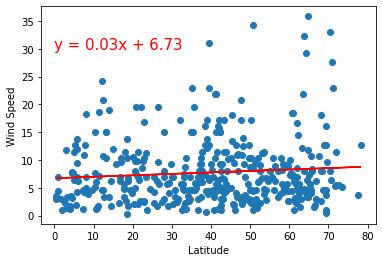

In [127]:
x_values = northern_data["Lat"]
y_values = northern_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is: {rvalue}')

In [128]:
print("This graph above is comparing Latitude of cities in the Northern Hemisphere to Wind Speed. We can see that there is essentially no relationship between latitude and wind speed.")

This graph above is comparing Latitude of cities in the Northern Hemisphere to Wind Speed. We can see that there is essentially no relationship between latitude and wind speed.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22107485640815328


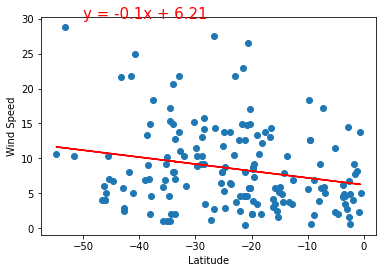

In [129]:
x_values = southern_data["Lat"]
y_values = southern_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is: {rvalue}')

In [130]:
print("This graph above is comparing Latitude of cities in the Southern Hemisphere to Wind Speed. We can see that there is essentially no relationship between latitude and wind speed.")

This graph above is comparing Latitude of cities in the Southern Hemisphere to Wind Speed. We can see that there is essentially no relationship between latitude and wind speed.
